In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Rocket(T,dt):
    #Assigning Parameters
    G=6.674*10**(-11)  #Gravitational Constant
    M=5.972*10**24     #Mass of the Earth
    sea=6378000        #distance from the center of the Earth to sea level
    karman=sea+100000  #distance from the center of the Earth to the Karman line
    maxThrust=24681000 #Maximum thrust of the first stage of the rocket in space
    R=287.05           #Ideal Gas Constant
    Area=40.47         #Vross-sectional area of the first stage rocket
    Cd=0.7             #Drag Coefficient for the first stage rocket
    
    #Function Variables
    number=0.0065*karman   #A unitless coefficient designed for the thrust components for take-off
    counter=0              #A counter used to cut off and on the engines for the second stage
    w=0                    #Another counter used for thr burning fuel rate
    SecondStage=False      #A True-False statement used to begin the second-half of the second stage
    N=int(T/dt)            #The number of loops the loop must go through based on total time and the change in time
    
    #Defining Masses
    payload=63800                 #The mass of the payload
    mi=1420788-(63800-payload)    #The initial mass of the rocket
    ifuelm=414000*3               #The initial mass of the fuel
    drym=mi-ifuelm                #The dry mass of the rocket
    
    #Initial Conditions
    vx=0                          #The initial x-velocity
    vy=0.01                       #The initial y-velocity isn't set to zero to avoid dividing by zero
    ax=0                          #Initial x-acceleration
    ay=0                          #Initial y-acceleration
    ry=sea                        #Initial y distance from the center of the Earth
    rx=0                          #Initial x distance from the center of the Earth
    m=mi                          #Setting the mass of the rocket to the initial mass
    r=np.sqrt(rx**2+ry**2)        #Setting the magnitude of the distance
    Drag=0                        #Initial drag force
    
    #Defining Arrays
    time=np.linspace(0,T,N)   #Array for time
    P=np.zeros(N)             #Array for position/distance
    V=np.zeros(N)             #Array for velocity
    A=np.zeros(N)             #Array for acceleration
    Mass=np.zeros(N)          #Array for mass
    Px=np.zeros(N)            #Array for x-position\distance
    Vx=np.zeros(N)            #Array for x-velocity
    Ax=np.zeros(N)            #Array for x-acceleration
    Py=np.zeros(N)            #Array for y-position/distance
    Vy=np.zeros(N)            #Array for y-velocity
    Ay=np.zeros(N)            #Array for y-acceleration
    D=np.zeros(N)             #Array for Drag
    
    
    
    
    
    
    #FIRST STAGE
    
    for i in range(N):             #Creating a Loop to update variables over a bit of time dt
        #Defining variables
        r=np.sqrt(rx**2+ry**2)     #Calculating the magnitude of distance from its components
        v=np.sqrt(vx**2+vy**2)     #Calculating the magnitude of velocity from its components
        a=np.sqrt(ax**2+ay**2)     #Calculating the magnitude of acceleration from its components
        
        #IF THE ROCKET CRASHES SET EVERYTHING TO 0
        if r<sea:
            r=sea
            v=0
            a=0
            vx=0
            vy=0
            ax=0
            ay=0
            q=i
            break #Break the Time loop
        
        #Assigning variables to Arrays to store the data
        P[i]=r
        V[i]=v
        A[i]=a
        Px[i]=rx
        Vx[i]=vx
        Ax[i]=ax
        Py[i]=ry
        Vy[i]=vy
        Ay[i]=ay
        Mass[i]=m
        D[i]=Drag
        
        #The Altitude changes pressure, density, and temperature
        if (r-sea)<11000:
            Temp = (15.04-0.00649*(r-sea))+ 273.1
            p=101290*(Temp/288.08)**5.256
            den=p/(R*Temp)
        if 11000<=(r-sea)<=25000:
            Temp = -56.46 + 273.1 
            p =22650*np.exp(1.73-0.000157*(r-sea))
            den=p/(R*Temp)
        if (r-sea)>25000:
            Temp = (-131.21 + .00299 * (r-sea) )+ 273.1
            p = 2488 * (Temp/ 216.6)**(-11.388)
            den=p/(R*Temp)
        if (r-sea)>100000: #if above the Karman Line
            den=0
            p=0
        
        #Since the rocket is burning fuel, the rocket must lose fuel at a constant rate
        fuelm=ifuelm-((i*dt)*(ifuelm/162))
        m=drym+fuelm                           #Recalculating the mass of the rocket after fuel loss
        
        #Defining forces
        Fg=(G*m*M)/(r**2)    #The force of gravity
        Fgx=Fg*(rx/r)        #The x-component of gravity based off of the position vector
        Fgy=Fg*(ry/r)        #The y-component of gravity based off of the position vector
        
        Thrust=maxThrust-18.3765*p                                     #The total thrust changes as the air pressure changes
        XThrust=Thrust*(np.sqrt(1-((1/(((r-sea)/(number))+1)**2))))    #The take-off x-thrust changes based off of altitude
        YThrust=Thrust*(1/(((r-sea)/(number))+1)**2)                   #y-thrust also changes based off of altitude
        
        Dx=-Cd*den*Area*v*vx/2       #The x-drag (air friction) is based off of its x-velocity, and air density
        Dy=-Cd*den*Area*v*vy/2       #The y-drag (air friction) is based off of its y-velocity, and air density
        Drag=np.sqrt(Dx**2+Dy**2)    #Calculating the total drag of the rocket
        
        #When the rocket burns out of fuel
        if fuelm <= 0:
            q=i         #Records the time the rocket has taken to run out of fuel
            break       #Breaks the Time loop
        
        
        #Euler's Method -- updating the variables based off of previous data and the change in data
        ax=(XThrust-Fgx+Dx)/m       #The x-acceleration is adding the x-forces and dividing by the rockets mass
        ay=(YThrust-Fgy+Dy)/m       #The y-acceleration is adding the y-forces and dividing by the rockets mass
            
        vx=vx+ax*dt                 #Updating the rockets x-velocity
        vy=vy+ay*dt                 #Updating the rockets y-velocity
        rx=rx+vx*dt                 #Updating the rockets x-distance
        ry=ry+vy*dt                 #Updating the rockets y-distance
        
    #When the rocket runs out of fuel, the first stage is detached and the second stage needs to begin
    #Defining paramters for second stage
    Stagetime=i*dt                #Calculating the time the first stage took
    ifuelmass=97000               #Redefining the initial fuel mass for the second stage
    inertmass=4000                #This is the same as dry mass for the second stage
    fuelmass=ifuelmass            #The fuelmass of the rocket is assigned to its initial value
    burntime=397                  #The total time that the rocket will use to burn up its fuel
    maxThrust=934000              #The maximum thrust of the rocket in space for the second stage engines
    m=payload+fuelmass+inertmass  #Recalculating the mass of the rocket
    Area=21.237                   #The new cross-sectional area of the rocket since the booster rockets were detached
    Cd=.5                         #The new drag coefficient of the rocket
    
    
    
    
    
    
    
    #SECOND STAGE
    
    #Since the value i has been reset, the number of loop cycles for the first stage needs to be subtracted from the 
    #total number of cycles left
    for i in range(N-q):   
        i=i+q                      #Updating the counter i in addition to the first stage counter
        rold=r                     #This is the position of the rocket before the new position is calculated
        r=np.sqrt(rx**2+ry**2)     #Calculating the new position
        v=np.sqrt(vx**2+vy**2)     #Calculating the new velocity
        a=np.sqrt(ax**2+ay**2)     #Calculating the new acceleration
        rnew=r                     #This is the new position of the rocket, rold and rnew will be used at the end of the loop
        
        
        #IF ROCKET CRASHES
        if r<sea:
            break  #Break out of the loop
            
        #Assigning variables to arrays to store the data
        P[i]=r
        V[i]=v
        A[i]=a
        Px[i]=rx
        Vx[i]=vx
        Ax[i]=ax
        Py[i]=ry
        Vy[i]=vy
        Ay[i]=ay
        Mass[i]=m
        D[i]=Drag
        
        #Recalculating the mass of the rocket
        fuelmass=ifuelmass-(((i*dt-Stagetime))*(ifuelmass/burntime))  #Calculating the new fuelmass since fuel was burnt
        m=payload+fuelmass+inertmass                                  #New mass of the rocket
        
        
        
        #Altitude changing pressure, density, and temperature
        if (r-sea)<11000:
            Temp = (15.04-0.00649*(r-sea))+ 273.1
            p=101290*(Temp/288.08)**5.256
            den=p/(R*Temp)
        if 11000<=(r-sea)<=25000:
            Temp = -56.46 + 273.1 
            p =22650*np.exp(1.73-0.000157*(r-sea))
            den=p/(R*Temp)
        if (r-sea)>25000:
            Temp = (-131.21 + .00299 * (r-sea) )+ 273.1
            p = 2488 * (Temp/ 216.6)**(-11.388)
            den=p/(R*Temp)
        if (r-sea)>100000: #At the Karman line
            den=0
            p=0
            
        #THRUST
        Thrust=maxThrust-18.3765*p    #The simplified Rocket Thrust Equation changes the thrust due to air pressure
        XThrust=Thrust                #All the thrust needs to be in the x-direction so the rocket can accelerate
        YThrust=0                     #itself into orbit and build up enough speed
        
        
        #SECOND-HALF of SECOND STAGE
        if fuelmass <= ifuelmass/10:  #When the rocket burns 9-10ths of its fuel
            counter=counter + 1       #counter is used to indicate when the second-half began
            XThrust=0                 #Don't accelerate the rocket
            YThrust=0                 #It needs to get further from the surface before it can burn again
            
            if counter == 1:          #If the second-half begins
                holdfuel=fuelmass     #Set "holdfuel" equal to the fuel mass right now
                
            fuelmass=holdfuel         #Sets the fuel mass equal to the fuel mass from the begining of the second-hal
            m=payload+fuelmass+inertmass  #Recalculates the mass
                                      #This makes sure that the fuelmass doesn't change as the rocket drifts into space
                
            #When the rocket is furthest from the surface, the rocket will begin to fall back down
            if rold>=rnew:        #If the new position is smaller, then turn on the rockets again!
                SecondStage=True  #Set this variable to true when the rocket begins to fall back to Earth
        
        
        #BURN ENGINES AGAIN
        if SecondStage==True:                                 #When the rocket begins falling
            XThrust=Thrust*(ry/r)                             #Let the thrust be parallel to the surface
            YThrust=Thrust*(-rx/r)                            #Found by using basic trigonometry
            w=w+1                                             #assiging a new counter when the engines start again
            fuelmass=holdfuel-((w*dt)*(ifuelmass/burntime))   #loses fuel based off when the engines started again
            m=payload+fuelmass+inertmass                      #Recalculating mass
        
        #DRAG\AIR-FRICTION
        Dx=-Cd*den*Area*v*vx/2       #Calculating air friction for x-component
        Dy=-Cd*den*Area*v*vy/2        #Calculating air friction for y-component
        Drag=np.sqrt(Dx**2+Dy**2)    #Calculating magnitude of air friction
        
        
        #WHEN OUT OF FUEL
        if fuelmass <= 0:        #If the rocket doesn't have any more fuel
            m=payload+inertmass  #The mass is simply the payload and the drymass
            YThrust=0            #Don't thrust anywhere
            XThrust=0            #There is no more fuel to burn
        
        #Calculating Gravity
        Fg=(G*m*M)/(r**2)      #Calculating the magnetude of gravity
        Fgx=Fg*(rx/r)          #Calculating the x-component of gravity
        Fgy=Fg*(ry/r)          #Calculating the y-component of gravity
        
        #Euler's Method
        ax=(XThrust-Fgx+Dx)/m  #Updating the x-acceleration by adding the forces and dividing by the mass
        ay=(YThrust-Fgy+Dy)/m  #Updating the y-acceleration by adding the forces and dividing by the mass
        
        vx=vx+ax*dt            #Calculating x-velocity by using previous velocity and adding the new bit of velocity
        vy=vy+ay*dt            #Calculating y-velocity by using previous velocity and adding the new bit of velocity
        rx=rx+vx*dt            #Calculating x-position by using previous position and adding the new bit of position
        ry=ry+vy*dt            #Calculating y-position by using previous position and adding the new bit of position
        
    #When the total time has passed, the loop will stop and the function will end    
    return (time,Mass,P,V,A,Px,Py,Vx,Vy,Ax,Ay,D) #Return the arrays that were storing the data

In [3]:
time,Mass,P,V,A,Px,Py,Vx,Vy,Ax,Ay,D=Rocket(1000,.01)

Text(0,0.5,'Air friction (N)')

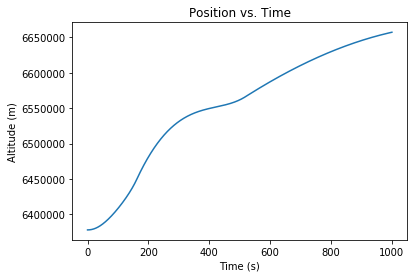

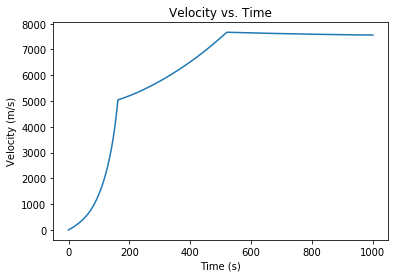

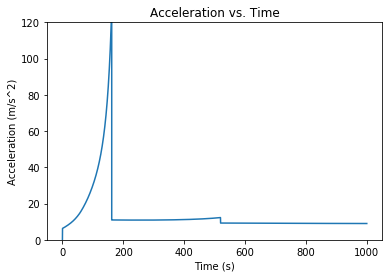

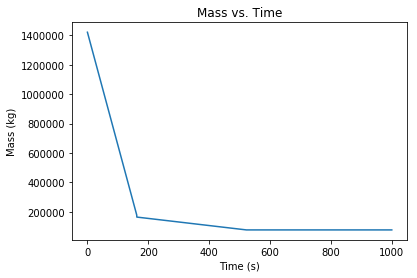

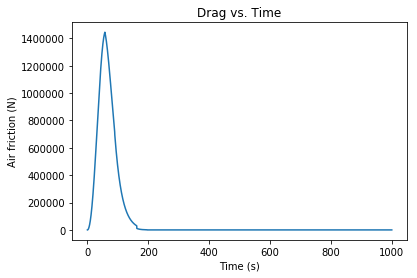

In [4]:
#Defining parameters
sea=6378000          #Setting the sea-level distance to the center of the Earth
karman=sea+100000    #Distance from the center of the Earth to the Karman line

#Plotting the Arrays
#POSITION VS TIME
plt.figure(1)
plt.plot(time,P)
plt.title("Position vs. Time")
plt.ylabel("Altitude (m)")
plt.xlabel("Time (s)")

#VELOCITY VS TIME
plt.figure(2)
plt.plot(time,V)
plt.title("Velocity vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

#ACCELERATION VS TIME
plt.figure(3)
plt.plot(time,A)
plt.ylim(0,120)
plt.title("Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")

#MASS VS TIME
plt.figure(4)
plt.plot(time,Mass)
plt.title("Mass vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Mass (kg)")

#DRAG VS TIME
plt.figure(5)
plt.plot(time,D)
plt.title("Drag vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Air friction (N)")

C:\Users\clemm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'X Position (m)')

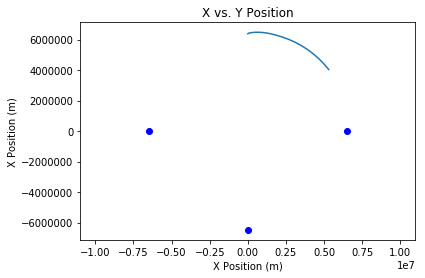

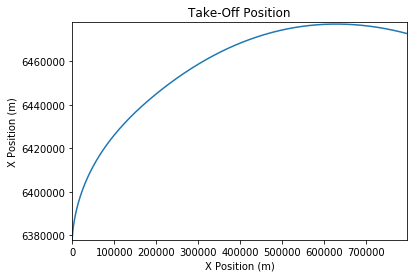

In [5]:
#Plotting more graphs
#ORBITING THE EARTH POSITION
plt.figure(6)
plt.plot(Px,Py)
plt.plot(0,-karman,'bo')
plt.plot(karman,0,'bo')
plt.plot(-karman,0,'bo')
plt.title("X vs. Y Position")
plt.axes().set_aspect('equal','datalim')
plt.xlabel("X Position (m)")
plt.ylabel("X Position (m)")

#TAKE-OFF POSITION
plt.figure(7)
plt.plot(Px,Py)
plt.title("Take-Off Position")
plt.ylim(sea,karman)
plt.xlim(0,sea/8)
plt.xlabel("X Position (m)")
plt.ylabel("X Position (m)")

#Notice the error below:
#This is simply caused by a problem that hasn't been fixed by the developers of the matplot library that was imported
#It is caused by setting the axis' on the same scale and by doing so incites an irrelevant error
#The developers are working on a solution but the our results remain the same